In [2]:
from skimage import io, img_as_float
import numpy as np
import matplotlib.pyplot as plt

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


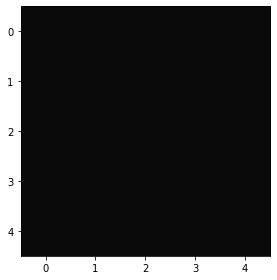

In [3]:
def box_kernel(size):
  return np.ones((size, size))/(size**2)

kernel = box_kernel(5)
print(kernel)
io.imshow(kernel)

In [4]:
def plot_kernel(kernel, cmap='Reds'):
  plt.imshow(kernel, cmap = cmap)
  plt.colorbar()
  plt.show()
  print('Kernel shape: ', kernel.shape)

In [5]:
def gaussian_kernel(size, sigma):
  x = np.linspace(0, size, size)
  y = np.linspace(0, size, size)

  X, Y = np.meshgrid(x, y, sparse = True)
  gaussian = np.exp(-((X-size//2)**2+(Y-size//2)**2)/(2*(sigma**2)))
  gaussian = gaussian/(2*np.pi*(sigma**2))

  return gaussian

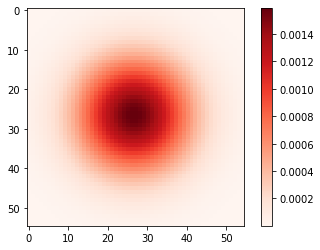

Kernel shape:  (55, 55)


In [20]:
kernel = gaussian_kernel(55, 10)
plot_kernel(kernel)

In [7]:
from numpy import pad

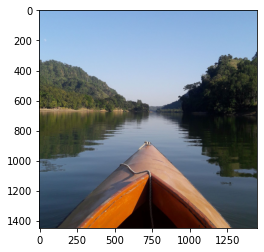

In [8]:
image = io.imread('/content/drive/MyDrive/CSE428/LAB4/kayak.jpg')
plt.imshow(image)

In [9]:
pad_width = 200

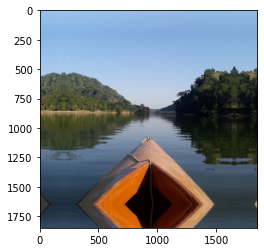

In [10]:
img_padded = pad(image, pad_width=[(pad_width,pad_width), (pad_width,pad_width), (0,0)], mode='reflect')
plt.imshow(img_padded, cmap='gray')

In [31]:
from skimage.color import rgb2gray
image = rgb2gray(image)
image.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


(1448, 1448)

In [21]:
# zero_padding
kernel_size = 35
kernel = gaussian_kernel(kernel_size, 50)

pad_width = int((kernel_size-1)/2)
img_padded = pad(image, pad_width=[(pad_width,pad_width), (pad_width,pad_width)], mode='constant', constant_values=0)

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
img_padded.shape

(1502, 1502)

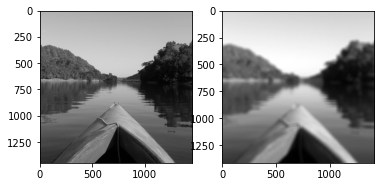

In [23]:
from scipy import signal
I=img_as_float(image)
I.shape
filtered_img = signal.correlate(I, kernel, mode='valid', method='direct')
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(filtered_img, cmap='gray')

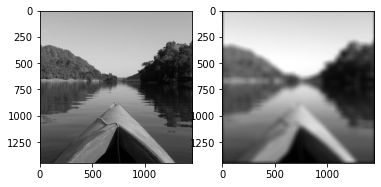

In [16]:
# zero_padding
kernel_size = 55
kernel = box_kernel(kernel_size)

pad_width = int((kernel_size-1)/2)
img_padded = pad(image, pad_width=[(pad_width,pad_width), (pad_width,pad_width)], mode='constant', constant_values=0)

filtered_img = signal.correlate(img_padded, kernel, mode='valid', method='auto')
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(filtered_img, cmap='gray')

In [17]:
from skimage.filters import median
img_filtered_median = median(filtered_img, selem=None, mode='nearest', cval=2.0, behavior='ndimage')

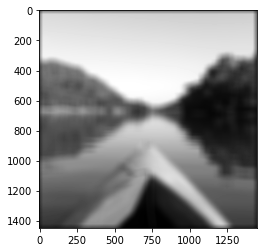

In [18]:
plt.imshow(img_filtered_median, cmap='gray')